<a href="https://colab.research.google.com/github/guillermohenrion/Intro-Python/blob/master/Exploraci%C3%B3n_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Covid-19: comparación entre paises 

Datos tomados desde: [CSSEGISandData / COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)




In [0]:
# Recupero los datos
!rm time_series_covid19_confirmed_global.csv
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


rm: cannot remove 'time_series_covid19_confirmed_global.csv': No such file or directory
--2020-04-27 15:05:59--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82672 (81K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>]  80.73K  --.-KB/s    in 0.02s   

2020-04-27 15:05:59 (4.82 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [82672/82672]



In [0]:
# Leo, saco columnas no necesaraias para el análisis, agrupo por país
import pandas as pd

df_covid = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_covid_g = df_covid
df_covid=df_covid.drop(['Province/State',	'Lat',	'Long'], axis=1)
df_covid.head()
df_covid=df_covid.groupby('Country/Region').sum()
df_covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26


In [64]:
df_covid.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,3.000000,3.535135,5.086486,7.751351,11.448649,15.821622,30.151351,33.329730,44.508108,53.659459,65.070270,90.740541,107.464865,129.145946,149.378378,166.454054,185.897297,200.648649,217.027027,231.145946,242.172973,244.437838,326.313514,361.540541,373.135135,384.994595,395.989189,406.140541,408.859459,411.875676,415.237838,424.713514,426.80000,430.059459,434.627027,439.935135,447.275676,454.659459,464.924324,477.670270,...,1161.194595,1311.189189,1471.394595,1645.983784,1821.367568,2044.491892,2259.681081,2527.854054,2862.654054,3206.978378,3571.313514,3892.648649,4229.129730,4635.064865,5040.405405,5477.437838,5922.691892,6355.983784,6753.967568,7141.248649,7546.443243,7998.940541,8460.962162,8959.600000,9381.891892,9917.410811,10296.421622,10676.729730,11108.416216,11629.302703,12103.481081,12522.789189,12973.394595,13358.091892,13773.464865,14178.643243,14636.367568,15186.481081,15658.075676,16062.027027
std,40.287688,47.271074,67.633789,103.362557,152.543112,211.504049,405.005232,447.496726,598.504278,720.611914,874.189955,1222.603155,1449.486795,1742.903411,2017.354951,2248.722202,2507.712587,2706.504894,2928.166427,3113.785492,3263.177285,3290.592646,4403.402047,4878.557342,5029.625967,5184.006356,5325.235141,5455.883849,5485.887881,5519.532771,5554.263276,5660.889588,5662.41828,5678.536739,5716.265582,5746.683616,5779.049282,5804.029629,5837.254867,5881.682866,...,6797.006807,7102.780426,7481.990583,7942.622538,8421.241915,9089.272087,9774.794195,10698.401642,11963.827870,13295.590390,14772.177496,16164.852600,17691.710483,19579.131374,21467.116353,23645.707325,25948.255258,28332.014930,30374.761188,32483.285919,34701.766764,37056.396221,39549.712154,42059.988364,44284.845492,46708.985555,48586.491194,50577.623339,52728.121279,55220.711763,57629.525144,59935.332495,62022.844706,63902.685064,65963.941895,68051.310572,70216.697613,72911.167191,75332.850197,77373.949461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

[]

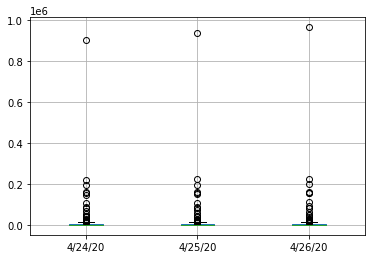

In [100]:
df_covid.boxplot(column=['4/24/20'	,'4/25/20'	,'4/26/20']).plot()

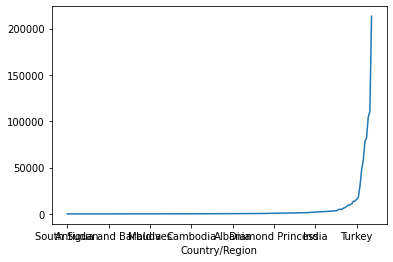

In [78]:
dfs=df_covid.sort_values(by=df_covid.columns[70])
dfs[df_covid.columns[70]].plot()


In [0]:
#Traspongo 
df_covid_t=df_covid.transpose()
df_covid_t.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0


,Argentina
count,96.000000
mean,700.645833
std,1105.186490
min,0.000000
25%,0.000000
50%,14.500000
75%,1166.000000
max,3892.000000


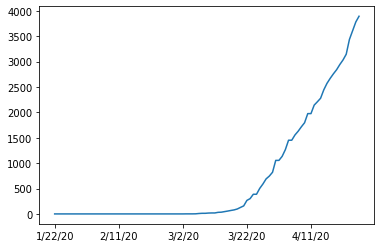

In [98]:
df_covid_t['Argentina'].plot()
pd.DataFrame(df_covid_t['Argentina']).describe()


[]

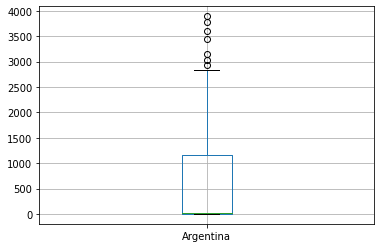

In [99]:
pd.DataFrame(df_covid_t['Argentina']).boxplot(column='Argentina').plot()

In [0]:
# Tomo data desde t0 para algunos paies
df_covid_t.head()
df_covid_t0=df_covid_t[1:]

df_covid_t0_Argentina=df_covid_t0["Argentina"]
df_covid_t0_Argentina=df_covid_t0_Argentina[df_covid_t0_Argentina>0]

df_covid_t0_Italia=df_covid_t0["Italy"]
df_covid_t0_Italia=df_covid_t0_Italia[df_covid_t0_Italia>0]

df_covid_t0_Chile=df_covid_t0["Chile"]
df_covid_t0_Chile=df_covid_t0_Chile[df_covid_t0_Chile>0]

df_covid_t0_Australia=df_covid_t0["Australia"]
df_covid_t0_Australia=df_covid_t0_Chile[df_covid_t0_Australia>0]

df_covid_t0_Spain=df_covid_t0["Spain"]
df_covid_t0_Spain=df_covid_t0_Spain[df_covid_t0_Spain>0]



In [0]:
#Con Plotly
import plotly.express as px

cntArgentina=df_covid_t0_Argentina.count()
colA=['Argentina']*cntArgentina
df_covid_t0_Argentina2=pd.DataFrame(df_covid_t0_Argentina)
df_covid_t0_Argentina2.insert(1, "Pais", colA, True)

cntChile=df_covid_t0_Chile.count()
colC=['Chile']*cntChile
df_covid_t0_Chile2=pd.DataFrame(df_covid_t0_Chile)
df_covid_t0_Chile2.insert(1, "Pais", colC, True)

cntItalia=df_covid_t0_Italia.count()
colI=['Italia']*cntItalia
df_covid_t0_Italia2=pd.DataFrame(df_covid_t0_Italia)
df_covid_t0_Italia2.insert(1, "Pais", colI, True)

cntSpain=df_covid_t0_Spain.count()
colS=['España']*cntSpain
df_covid_t0_Spain2=pd.DataFrame(df_covid_t0_Spain)
df_covid_t0_Spain2.insert(1, "Pais", colS, True)

df_covid_t0_Argentina2.columns=['Confirmados', 'Pais']
df_covid_t0_Chile2.columns=['Confirmados', 'Pais']
df_covid_t0_Italia2.columns=['Confirmados', 'Pais']
df_covid_t0_Spain2.columns=['Confirmados', 'Pais']

df2=pd.concat([
    df_covid_t0_Argentina2,df_covid_t0_Chile2, df_covid_t0_Italia2, df_covid_t0_Spain2
],ignore_index=True).drop_duplicates().reset_index(drop=True)

fig = px.line(df2,  y="Confirmados", color='Pais', title="Confirmados por pais (ref.T0)")
fig.show()

In [0]:
#Forma genérica

dfg=pd.DataFrame()
df_covid_t0_p={}
cp = ['Argentina', 'Chile', 'Spain', 'Italy', 'China', 'Brazil', 'US', 'Australia']
#for c in df_covid_t.columns: # Selecciono algunos, porque con todos no se entiende em gráfico
for c in cp:
  dfp=df_covid_t0[c]
  dfp=dfp[dfp>0]
  cnp=dfp.count()
  colp=[c]*cnp
  dfp2=pd.DataFrame(dfp)
  dfp2.insert(1, "Pais", colp, True)
  dfp2.columns=['Confirmados', 'Pais']
  dfg=pd.concat([dfg ,dfp2],ignore_index=True).drop_duplicates().reset_index(drop=True)

fig = px.line(dfg,  y="Confirmados", color='Pais', title="Confirmados por pais (ref.T0)")
fig.show()

In [0]:
#Confirmados a la fecha
df_covid.head()
c=df_covid_g.columns
l=len(c)
dfc=df_covid_g.drop(c[4:l-1], axis=1)
dfc.head()
dfc.columns=['Province/State'	,'Country/Region'	,'Lat'	,'Long','Confirmados']
dfc.head()


,Province/State,Country/Region,Lat,Long,Confirmados
0,NaN,Afghanistan,33.0000,65.0000,1531
1,NaN,Albania,41.1533,20.1683,726
2,NaN,Algeria,28.0339,1.6596,3382
3,NaN,Andorra,42.5063,1.5218,738
4,NaN,Angola,-11.2027,17.8739,26


In [0]:
from geopy.geocoders import Nominatim
import folium
import base64
import io

mapa = folium.Map(location=(-34.6131516,	 -58.3772316), zoom_start=4)

for index,row in dfc.iterrows(): 
  icon_url = 'https://upload.wikimedia.org/wikipedia/commons/9/9e/WX_circle_red.png'

  icon = folium.features.CustomIcon(icon_url,icon_size=(max(row['Confirmados']/10000,5), max(row['Confirmados']/10000, 5)))  # Creating a custom Icon

  folium.Marker(location=(row['Lat'],row['Long']),  icon=icon, tooltip=row['Confirmados']).add_to(mapa)

display(mapa)
